# Heart Disease Health Indicators
심장병이 있는사람의 특성분류 및 예측

---

Context
Heart Disease is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. In the United States alone, heart disease claims roughly 647,000 lives each year — making it the leading cause of death. The buildup of plaques inside larger coronary arteries, molecular changes associated with aging, chronic inflammation, high blood pressure, and diabetes are all causes of and risk factors for heart disease.

While there are different types of coronary heart disease, the majority of individuals only learn they have the disease following symptoms such as chest pain, a heart attack, or sudden cardiac arrest. This fact highlights the importance of preventative measures and tests that can accurately predict heart disease in the population prior to negative outcomes like myocardial infarctions (heart attacks) taking place.

The Centers for Disease Control and Prevention has identified high blood pressure, high blood cholesterol, and smoking as three key risk factors for heart disease. Roughly half of Americans have at least one of these three risk factors. The National Heart, Lung, and Blood Institute highlights a wider array of factors such as Age, Environment and Occupation, Family History and Genetics, Lifestyle Habits, Other Medical Conditions, Race or Ethnicity, and Sex for clinicians to use in diagnosing coronary heart disease. Diagnosis tends to be driven by an initial survey of these common risk factors followed by bloodwork and other tests.

Content
The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, I downloaded a csv of the dataset available on Kaggle for the year 2015. This original dataset contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses.

This dataset contains 253,680 survey responses from cleaned BRFSS 2015 to be used primarily for the binary classification of heart disease. Not that there is strong class imbalance in this dataset. 229,787 respondents do not have/have not had heart disease while 23,893 have had heart disease. The question to be explored is:

1. To what extend can survey responses from the BRFSS be used for predicting heart disease risk?
and

2. Can a subset of questions from the BRFSS be used for preventative health screening for diseases like heart disease?
Acknowledgements
It it important to reiterate that I did not create this dataset, it is just a cleaned and consolidated dataset created from the BRFSS 2015 dataset already on Kaggle. That dataset can be found here and the notebook I used for the data cleaning can be found here.

Inspiration
Let's build some predictive models for for heart disease.


#### 데이터 설명
반응 변수/종속 변수

HeartDiseaseorAttack :관상 동맥 심장 질환(CHD) 또는 심근 경색증(MI)이 있다고 보고한적이 있는 응답자

독립 변수
HighBP 의사, 간호사 또는 기타 의료 전문가로부터 고혈압이 있다고 말한 성인

HighChol 의사, 간호사 또는 기타 건강 전문가로부터 혈중 콜레스테롤이 높다는 말을 들은적이 있다

CholCheck 최근 5년 이내 콜레스테롤 검사

BMI 체질량지수

Smoker 적어도 5갑의 담배를 피웠다

Stroke (지금까지) 뇌졸중에 걸린적이있다

Diabetes 0은 당뇨병 없음, 1은 당뇨병 전단계, 2는 당뇨병

PhysActivity 지난 30일 동안 정규직 이외의 신체활동이나 운동을 했다

Fruits 하루 1회 이상 과일 섭취

Veggies 하루 1회 이상 채소 섭취

HvyAlcoholConsump 음주

Sex : 성별

Age : 나이(5년단위) 1~14


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

## 데이터 load

In [2]:
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,Sex,Age
0,0,1,1,1,40,1,0,0,0,0,1,0,0,9
1,0,0,0,0,25,1,0,0,1,0,0,0,0,7
2,0,1,1,1,28,0,0,0,0,1,0,0,0,9
3,0,1,0,1,27,0,0,0,1,1,1,0,0,11
4,0,1,1,1,24,0,0,0,1,1,1,0,0,11


In [3]:
# 결측치 확인
df.isnull().sum() 
# 결측치 x

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
Sex                     0
Age                     0
dtype: int64

In [4]:
# # 예측해야 할 변수인 `HeartDiseaseorAttack`를 제거하여 머신러닝 입력값인 x에 저장
# x = df.drop(columns = ['HeartDiseaseorAttack']).to_numpy()
# x

In [5]:
x = df.drop(columns = ['HeartDiseaseorAttack'])
x

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,Sex,Age
0,1,1,1,40,1,0,0,0,0,1,0,0,9
1,0,0,0,25,1,0,0,1,0,0,0,0,7
2,1,1,1,28,0,0,0,0,1,0,0,0,9
3,1,0,1,27,0,0,0,1,1,1,0,0,11
4,1,1,1,24,0,0,0,1,1,1,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,0,1,5
253676,1,1,1,18,0,0,2,0,0,0,0,0,11
253677,0,0,1,28,0,0,0,1,1,0,0,0,2
253678,1,0,1,23,0,0,0,0,1,1,0,1,7


In [6]:
# # 예측해야 할 변수 `HeartDiseaseorAttack`만을 선택하여 numpy 형태로 y에 저장
# y = df['HeartDiseaseorAttack']
# y = y.to_numpy().ravel() # 1 차원 벡터 형태로 출력하기 위해 ravel 사용
# y

In [7]:
y = df['HeartDiseaseorAttack']

In [8]:
# sklearn train_test_split (train, test 분리 8:2)
from sklearn.model_selection import train_test_split

# test size = 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## DecisionTreeClassifier

In [9]:
from sklearn.tree import DecisionTreeClassifier

# 의사결정 모델 class를 가져 옵니다.
model = DecisionTreeClassifier()

# fit 함수를 사용하여 데이터를 학습합니다.
model.fit(x_train, y_train)

# score 함수를 사용하여 모델의 성능을 출력합니다.
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9376626064333018
0.8856630400504573


In [10]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# import xgboost as xgb
# from xgboost.sklearn import XGBClassifier


# models = []
# models.append(('LR', LogisticRegression(max_iter =5000))) # 로지스틱 분류기 
# models.append(('LDA', LinearDiscriminantAnalysis()))  # LDA 모델
# models.append(('KNN', KNeighborsClassifier()))  # KNN 모델
# models.append(('NB', GaussianNB()))  # 가우시안 나이브 베이즈 모델
# models.append(('RF', RandomForestClassifier()))  # 랜덤포레스트 모델
# models.append(('XGB', XGBClassifier()))  # XGB 모델

# for name, model in models:
#     model.fit(x_train, y_train)
#     msg = "%s - train_score : %f, test score : %f" % (name, model.score(x_train, y_train), model.score(x_test, y_test))
#     print(msg)

### 교차검증 

의사결정나무는 깊이가 깊어질수록 과적합 문제 발생가능성이 높기 때문에 교차검증을 통해 과적합을 막아줌

K-fold

train, test를 나눠 반복 검증 k값을 정해준 후, k번의 학습과 검증

GridSearchCV
최적의 파라미터를 설정하기 위해 사용

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# 성능 비교에 필요한 모델 파라미터들을 정의합니다.
parameters = {'criterion': ['gini','entropy'], 
              'max_depth': [3, 4, 5, 6],  # DecisionTree 최대 깊이
              'max_features': ['auto', 'sqrt', 'log2']}

# 5개의 fold를 구성합니다.
cv = KFold(n_splits=5)
# 의사결정트리 모델을 튜닝하기 위하여 선언합니다.
DT = DecisionTreeClassifier()

# 모델 튜닝을 위해서 GridSearchCV를 사용합니다.
DT_CV = GridSearchCV(DT, parameters, scoring = 'accuracy', cv = cv, n_jobs= -1) # n_jobs = -1 -> 모든 cpu를 사용해서 모델을 돌림
# 학습을 수행합니다.
DT_CV.fit(x_train, y_train) # 5등분된 train(k-fold)

# 결과를 출력합니다.
print(DT_CV.score(x_train, y_train))
print(DT_CV.score(x_test, y_test))

0.9065062283191422
0.9069694102806686


In [12]:
# 가장 성능이 좋았던 파라미터 출력
DT_CV.best_params_

{'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2'}

In [13]:
# 가장 성능이 좋았던 파라미터로 수행한 모델 저장
best_DT_CV = DT_CV.best_estimator_

# 가장 좋은 성능을 보여준 모델의 결과를 출력
best_DT_CV.score(x_test, y_test)

0.9069694102806686

## confusion matrix

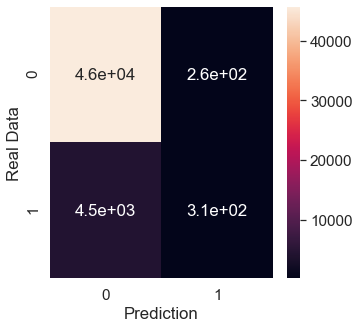

array([[45707,   257],
       [ 4463,   309]], dtype=int64)

In [14]:
from sklearn.metrics import confusion_matrix

model_predition = best_DT_CV.predict(x_test)

cm = confusion_matrix(y_test, model_predition)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Real Data')
plt.show()
cm

In [15]:
import sklearn.metrics as mt

print("accuracy score: {}".format(mt.accuracy_score(y_test, model_predition)))
print("recall_score: {}".format(mt.recall_score(y_test, model_predition)))
print("Precision score: {}".format(mt.precision_score(y_test, model_predition)))

accuracy score: 0.9069694102806686
recall_score: 0.06475272422464376
Precision score: 0.5459363957597173


### 데이터 불균형으로 재현율이 매우 낮게 나타나기 때문에 over sampling으로 Target의 개수를 조정

In [16]:
import imblearn
import pandas as pd
from collections import Counter
from matplotlib import pyplot

# 필요 함수 정의
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()

In [32]:
# from imblearn.over_sampling import RandomOverSampler
# X_resampled, y_resampled = RandomOverSampler(random_state=0).fit_resample(x, y)
# count_and_plot(y_resampled)

## randomoversample은 과적합의 문제가 있을 수 있기때문에 안쓰기로하자

### SMOTE
소수 데이터 중 특정 벡터 (샘플)와 가장 가까운 이웃 사이의 차이를 계산한다.

이 차이에 0과 1사이의 난수를 곱한다.

타겟 벡터에 추가한다.

두 개의 특정 기능 사이의 선분을 따라 임의의 점을 선택할 수 있다.

Class=0, n=229787 (50.000%)
Class=1, n=229787 (50.000%)


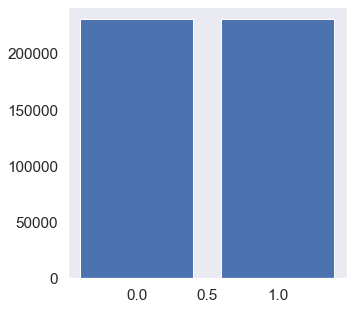

In [33]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=0).fit_resample(x, y)
count_and_plot(y_resampled)

In [19]:
# sklearn train_test_split (train, test 분리 8:2)
from sklearn.model_selection import train_test_split

# test size = 0.2
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 0)

In [20]:
from sklearn.tree import DecisionTreeClassifier

# 의사결정 모델 class를 가져 옵니다.
model = DecisionTreeClassifier()

# fit 함수를 사용하여 데이터를 학습합니다.
model.fit(x_train, y_train)

# score 함수를 사용하여 모델의 성능을 출력합니다.
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.8629898900883699
0.8256758962084535


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# 성능 비교에 필요한 모델 파라미터들을 정의합니다.
parameters = {'criterion': ['gini','entropy'], 
              'max_depth': [3, 4, 5, 6],  # DecisionTree 최대 깊이
              'max_features': ['auto', 'sqrt', 'log2']}

# 5개의 fold를 구성합니다.
cv = KFold(n_splits=5)
# 의사결정트리 모델을 튜닝하기 위하여 선언합니다.
DT = DecisionTreeClassifier()

# 모델 튜닝을 위해서 GridSearchCV를 사용합니다.
DT_CV = GridSearchCV(DT, parameters, scoring = 'accuracy', cv = cv, n_jobs= -1) # n_jobs = -1 -> 모든 cpu를 사용해서 모델을 돌림
# 학습을 수행합니다.
DT_CV.fit(x_train, y_train) # 5등분된 train(k-fold)

# 결과를 출력합니다.
print(DT_CV.score(x_train, y_train))
print(DT_CV.score(x_test, y_test))

0.7155897176459709
0.7195996300930207


In [22]:
# 가장 성능이 좋았던 파라미터 출력
DT_CV.best_params_

{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt'}

In [23]:
# 가장 성능이 좋았던 파라미터로 수행한 모델 저장
best_DT_CV = DT_CV.best_estimator_

# 가장 좋은 성능을 보여준 모델의 결과를 출력
best_DT_CV.score(x_test, y_test)

0.7195996300930207

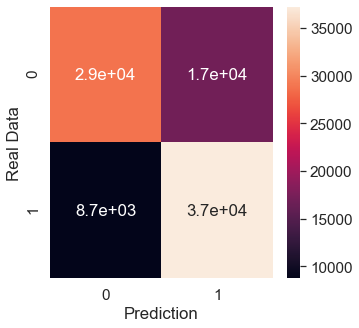

array([[28888, 17030],
       [ 8743, 37254]], dtype=int64)

In [24]:
from sklearn.metrics import confusion_matrix

model_predition = best_DT_CV.predict(x_test)

cm = confusion_matrix(y_test, model_predition)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Real Data')
plt.show()
cm


accuracy는 떨어졌지만, recall과 precision이 크게증가

In [25]:
import sklearn.metrics as mt

print("accuracy score: {}".format(mt.accuracy_score(y_test, model_predition)))
print("recall_score: {}".format(mt.recall_score(y_test, model_predition)))
print("Precision score: {}".format(mt.precision_score(y_test, model_predition)))

accuracy score: 0.7195996300930207
recall_score: 0.8099223862425811
Precision score: 0.6862795667231597


In [94]:
# for i in range(20): 
#     prediction = best_DT_CV.predict(x_test[i].reshape(1,-1))
#     print("{} 번째 테스트 데이터의 예측 결과: {}, 실제 데이터: {}".format(i, prediction[0], y_test[i]))

In [ ]:
# for i in df.HeartDiseaseorAttack.values:
#     if i  == 1:
#         df.HeartDiseaseorAttack.replace(i, 'O', inplace = True)
#     else:
#         df.HeartDiseaseorAttack.replace(i, 'X', inplace = True)

In [ ]:
# df.HeartDiseaseorAttack.replace(1, '심장병O', inplace = True)
# df.HeartDiseaseorAttack.replace(0, '심장병X', inplace = True)

In [26]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

In [27]:
from sklearn.tree import plot_tree # tree diagram

model1 = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 6, max_features= 'log2')
model1.fit(x_train, y_train)
model1

DecisionTreeClassifier(max_depth=6, max_features='log2')

In [28]:
print(model1.score(x_train, y_train))
print(model1.score(x_test, y_test))

0.7064181755376585
0.7096447805037263


In [93]:
# plt.figure(figsize=(100,0))

# from sklearn.tree import plot_tree # tree diagram
# a = df.drop(columns = ['HeartDiseaseorAttack'])
# feature_names = a.columns[:,]
# target_names = df['HeartDiseaseorAttack'].unique().tolist()

# plot_tree(model1, 
#           feature_names = feature_names, 
#           class_names = target_names, 
#           filled = True, 
#           rounded = True)


## feature, target을 df로해서 새로운모델에 적용시키지 x

In [29]:
y_resampled = pd.DataFrame(y_resampled)
y_resampled

,HeartDiseaseorAttack
0,0
1,0
2,0
3,0
4,0
...,...
459569,1
459570,1
459571,1
459572,1


In [30]:
y_resampled.HeartDiseaseorAttack.replace(1, '심장병O', inplace = True)
y_resampled.HeartDiseaseorAttack.replace(0, '심장병X', inplace = True)
# 알아보기 쉽게 변환하는 과정

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48337 missing from current font.
  font.set_text(s, 0.0, flags=flags)


[Text(2790.0, 5047.714285714285, 'Age <= 8.5\ngini = 0.5\nsamples = 367659\nvalue = [183869, 183790]\nclass = 심장병X'),
 Text(1395.0, 4271.142857142857, 'HighBP <= 0.5\ngini = 0.413\nsamples = 142351\nvalue = [100892, 41459]\nclass = 심장병X'),
 Text(697.5, 3494.5714285714284, 'Age <= 6.5\ngini = 0.278\nsamples = 88237\nvalue = [73492, 14745]\nclass = 심장병X'),
 Text(348.75, 2718.0, 'Smoker <= 0.5\ngini = 0.194\nsamples = 52472\nvalue = [46757, 5715]\nclass = 심장병X'),
 Text(174.375, 1941.4285714285716, 'PhysActivity <= 0.5\ngini = 0.155\nsamples = 34105\nvalue = [31220, 2885]\nclass = 심장병X'),
 Text(87.1875, 1164.8571428571431, 'Age <= 2.5\ngini = 0.284\nsamples = 5800\nvalue = [4807, 993]\nclass = 심장병X'),
 Text(43.59375, 388.2857142857147, 'gini = 0.142\nsamples = 978\nvalue = [903, 75]\nclass = 심장병X'),
 Text(130.78125, 388.2857142857147, 'gini = 0.308\nsamples = 4822\nvalue = [3904, 918]\nclass = 심장병X'),
 Text(261.5625, 1164.8571428571431, 'Age <= 5.5\ngini = 0.125\nsamples = 28305\nvalue = [

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49900 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48337 missing from current font.
  font.set_text(s, 0, flags=flags)


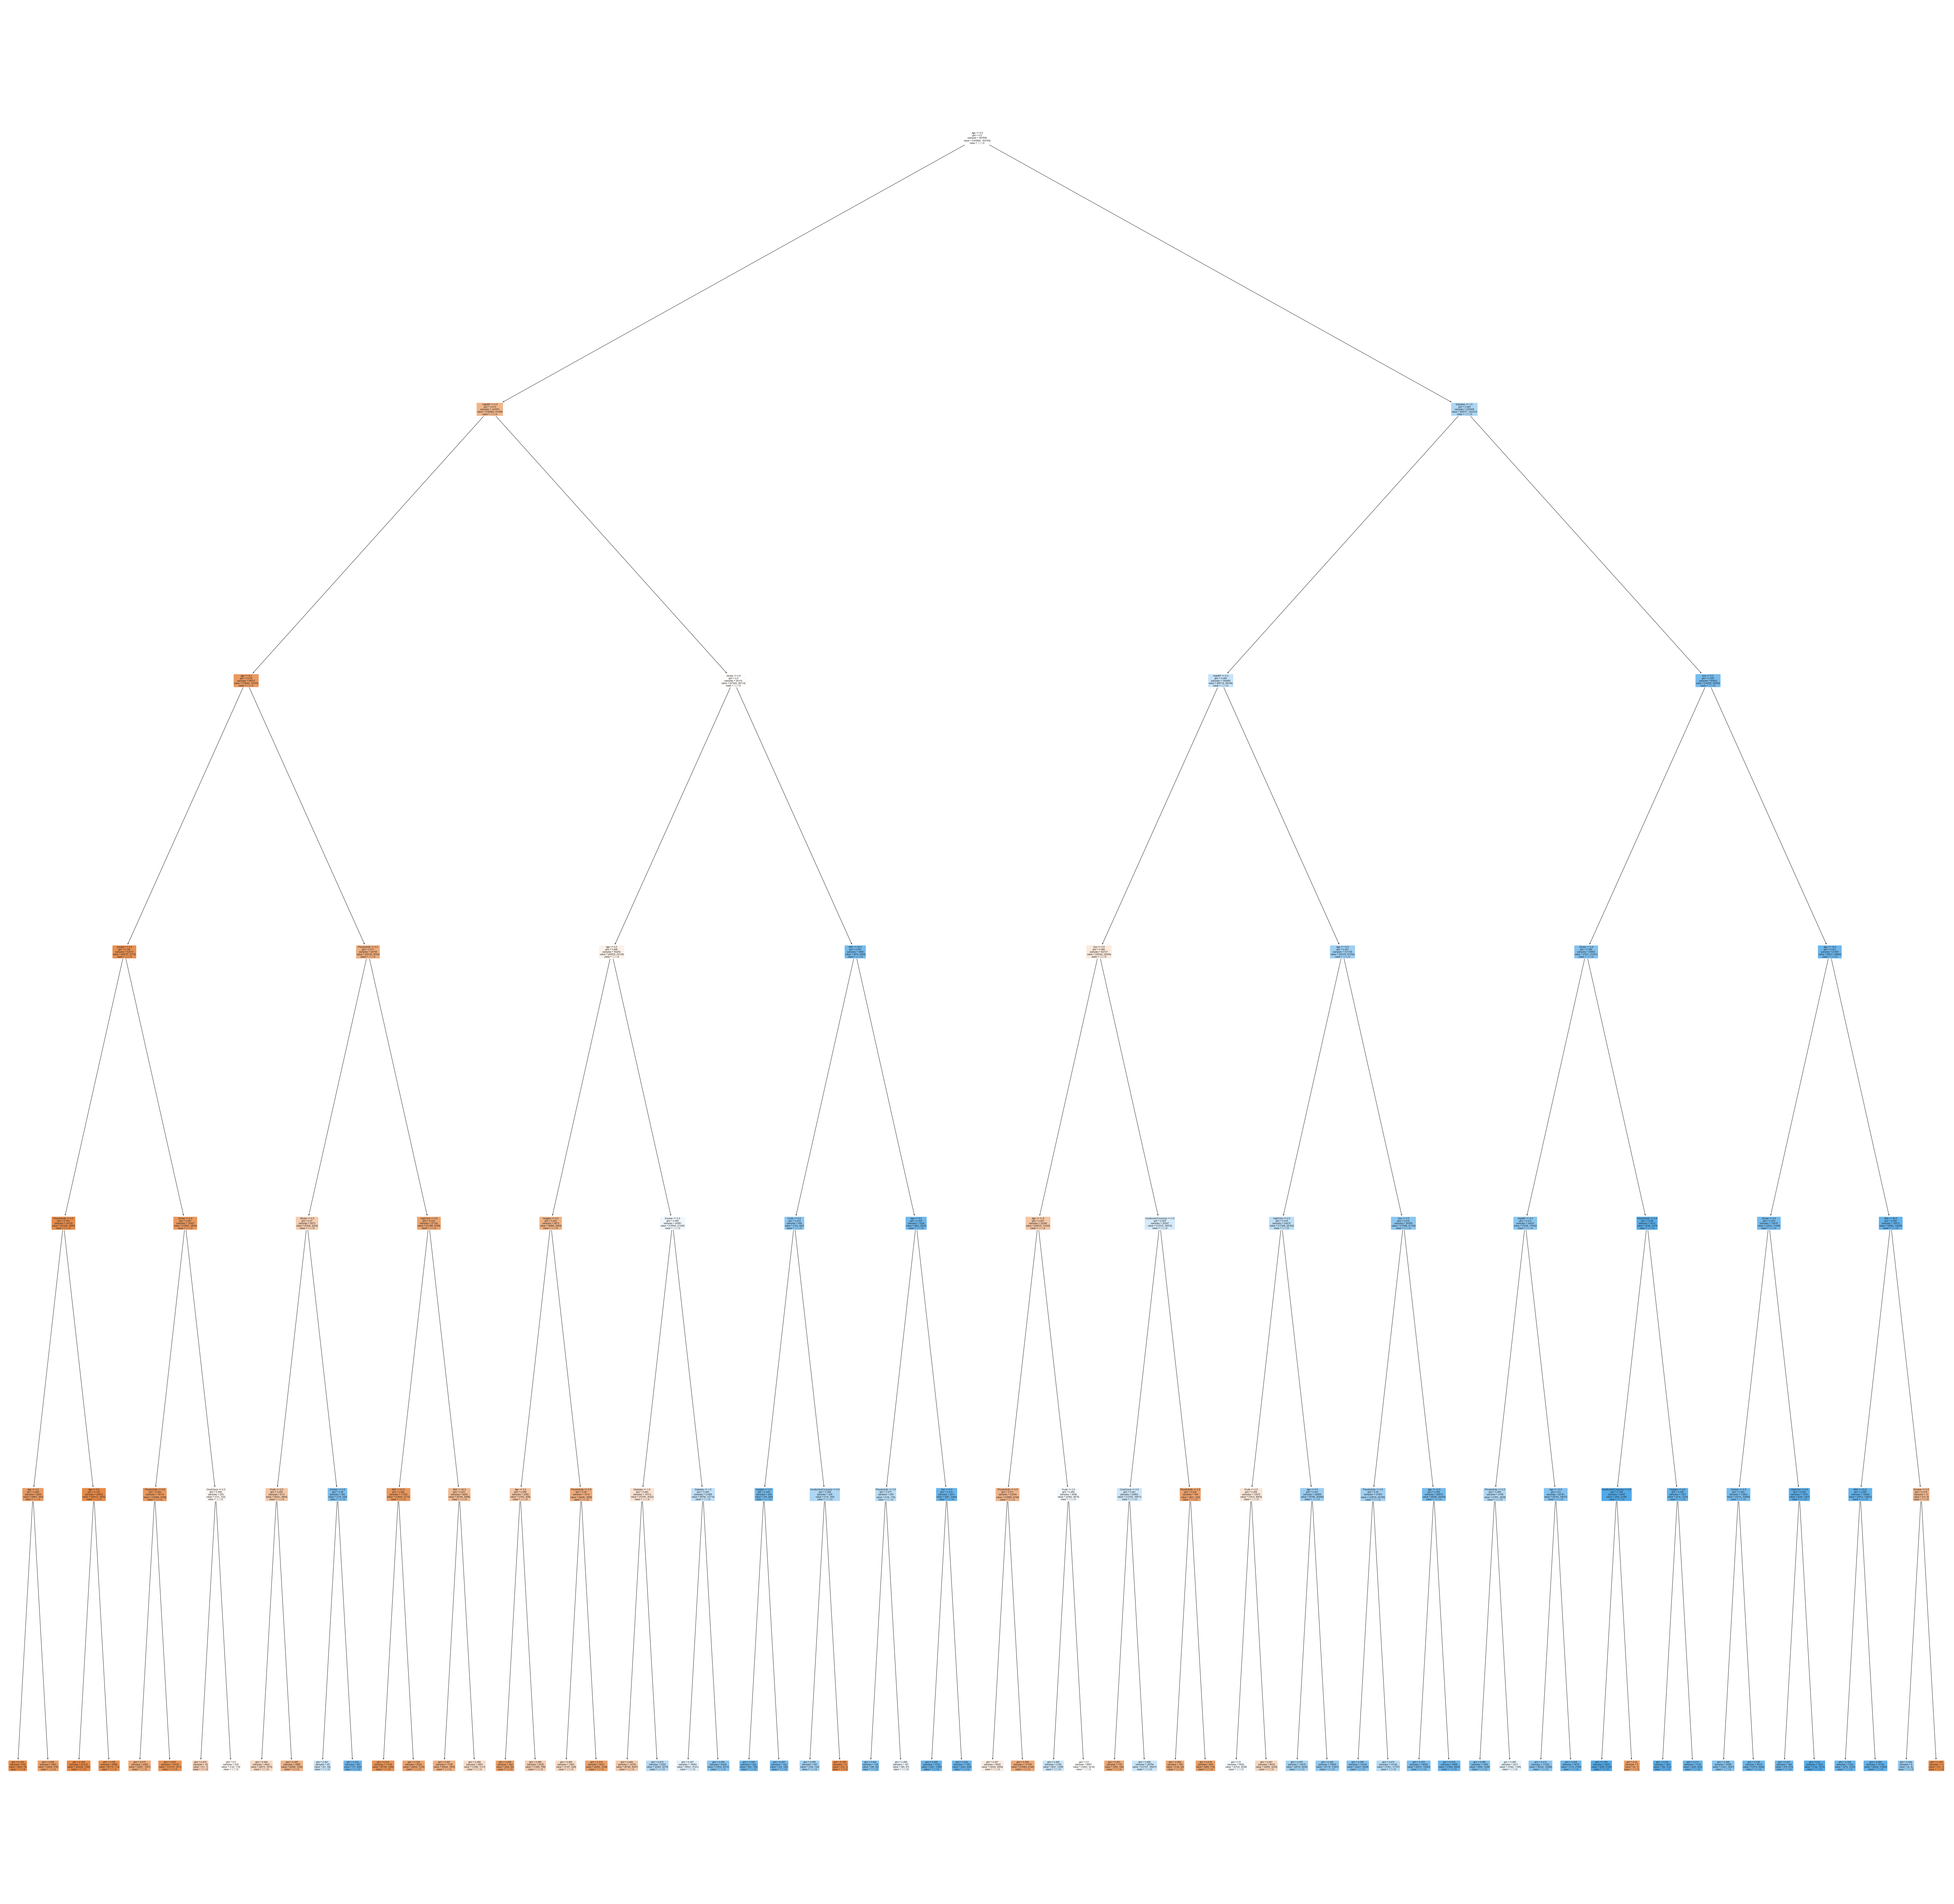

In [31]:
plt.figure(figsize=(100,100))

from sklearn.tree import plot_tree # tree diagram
feature_names = X_resampled.columns[:,]
target_names = y_resampled['HeartDiseaseorAttack'].unique().tolist()

plot_tree(best_DT_CV,  # model1 = best_DT_CV 둘다써도 상관 X 같은값 나올듯
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)


